# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng


In [1]:
import pandas as pd
import numpy as np

## HIỂU DỮ LIỆU


1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?


In [2]:
# 1
df = pd.read_csv('data/tips.csv')
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# 2
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# 3
df.shape

(244, 7)

In [5]:
# 4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [31]:
# 5
sex = df['sex'].value_counts().reset_index()
sex.index = sex['sex']
sex['prob'] = (sex['count'] / len(df)).round(2)
sex.drop('sex', axis=1, inplace=True)
sex

,count,prob
sex,,
Male,157,0.64
Female,87,0.36


In [32]:
# 6
smoker = df['smoker'].value_counts().reset_index()
smoker.index = smoker['smoker']
smoker['prob'] = (smoker['count'] / len(df)).round(2)
smoker.drop('smoker', axis=1, inplace=True)
smoker

,count,prob
smoker,,
No,151,0.62
Yes,93,0.38


In [9]:
# 7
df['day'].value_counts().idxmax(), round(df['day'].value_counts().max() / len(df) * 100,2) 

('Sat', 35.66)

In [40]:
# 8
df['time'].value_counts().idxmax()

'Dinner'

In [42]:
# 9
df['size'].value_counts().idxmax()

2

In [44]:
# 10
df['size'].mean()

2.569672131147541

## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó


1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.


## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib


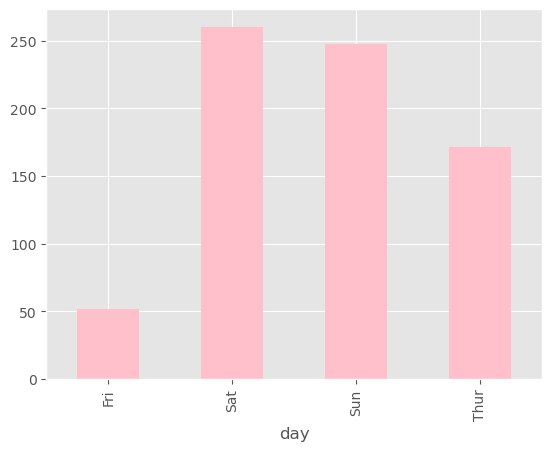

In [12]:
# 1
df.groupby('day')['tip'].sum().plot(kind='bar', color= 'pink')
plt.show()

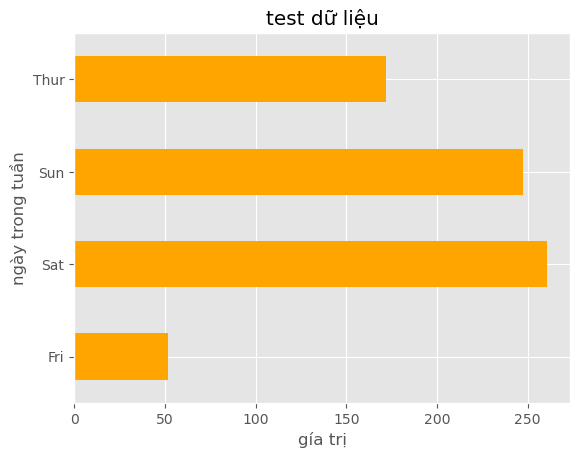

In [17]:
df.groupby('day')['tip'].sum().plot(
    kind='barh',
    color='orange',
    title='test dữ liệu',
    xlabel='gía trị',
    ylabel='ngày trong tuần'
)
plt.show()


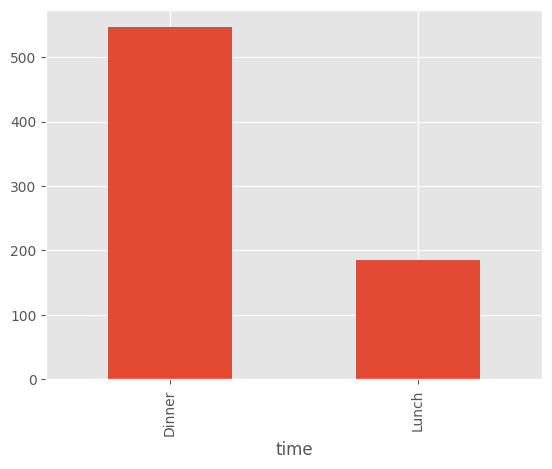

In [56]:
# 2
df.groupby('time')['tip'].sum().plot(kind='bar')
plt.show()

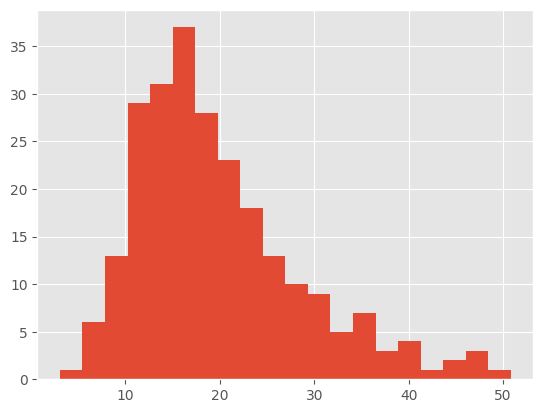

In [71]:
# 3
df['total_bill'].hist(bins=20)
plt.show()

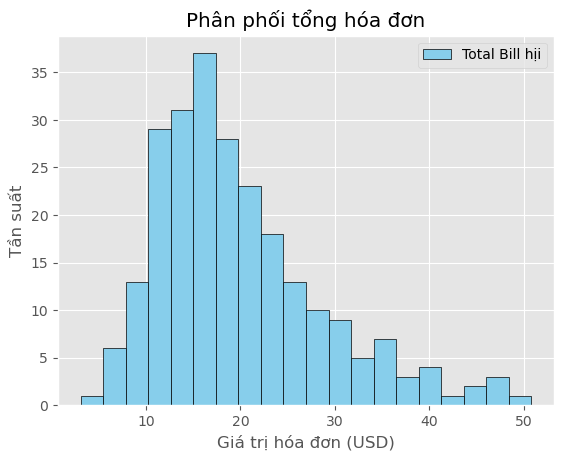

In [26]:
df['total_bill'].hist(bins=20, color="skyblue", edgecolor="black", label="Total Bill hịi")
plt.title("Phân phối tổng hóa đơn")      # Tiêu đề
plt.xlabel("Giá trị hóa đơn (USD)")       # Nhãn trục X
plt.ylabel("Tần suất")                    # Nhãn trục Y
# plt.grid(True, linestyle="--", alpha=0.7) # Lưới nền
plt.legend()                      
plt.show()

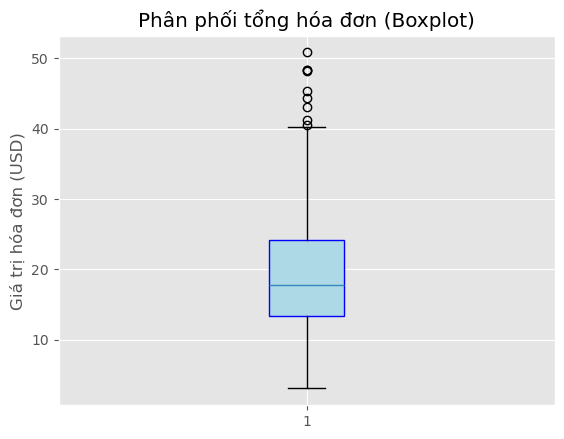

In [34]:
# # 4
# plt.boxplot(df['total_bill'])
# plt.show()
import matplotlib.pyplot as plt

plt.boxplot(
    df['total_bill'],
    patch_artist=True,              # cho phép tô màu box
    boxprops=dict(facecolor="lightblue", color="blue"),  # màu box và viền
    # medianprops=dict(color="red", linewidth=2),          # màu đường median
    # whiskerprops=dict(color="green"),                    # màu râu (whisker)
    # capprops=dict(color="black"),                        # màu mũ (caps)
    # flierprops=dict(markerfacecolor="orange", marker="o", markersize=6) # màu outlier
)

plt.title("Phân phối tổng hóa đơn (Boxplot)")  
plt.ylabel("Giá trị hóa đơn (USD)")  

plt.show()


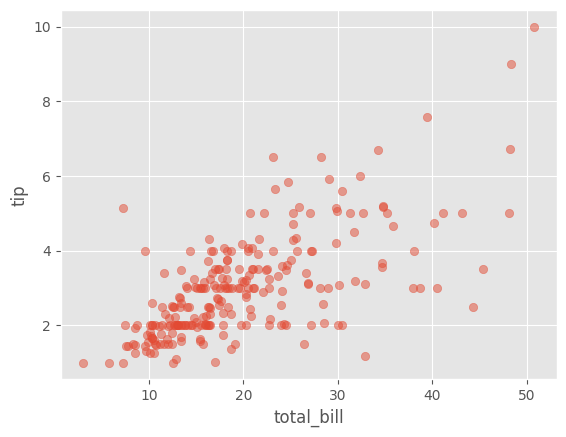

In [62]:
# 5
plt.scatter(df['total_bill'], df['tip'], alpha=0.5)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

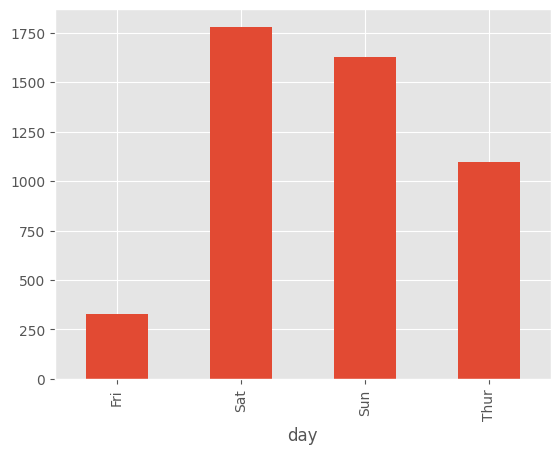

In [66]:
# 6
df.groupby('day')['total_bill'].sum().plot(kind='bar')
plt.show()

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn


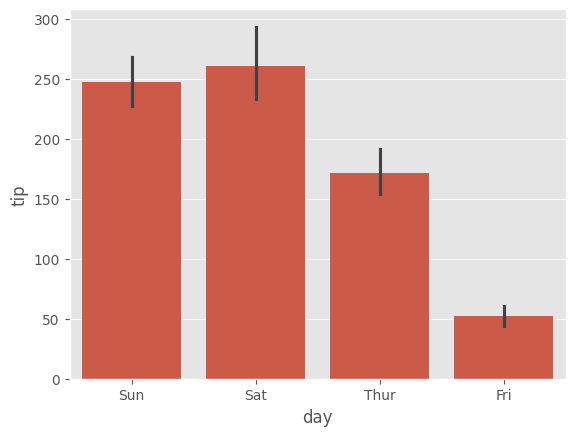

In [68]:
# 1
sns.barplot(x='day', y='tip', data=df, estimator=sum)
plt.show()

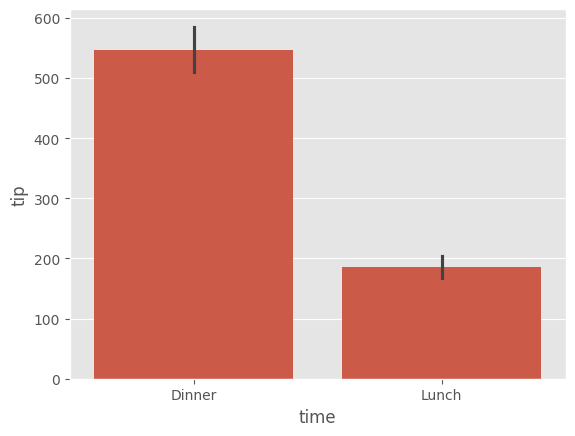

In [69]:
# 2
sns.barplot(x='time', y='tip', data=df, estimator=sum)
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

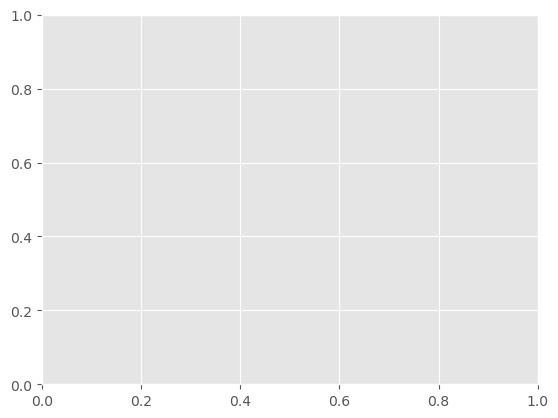

In [41]:
# 3
sns.histplot(df.total_bill, bin=20)
plt.show()

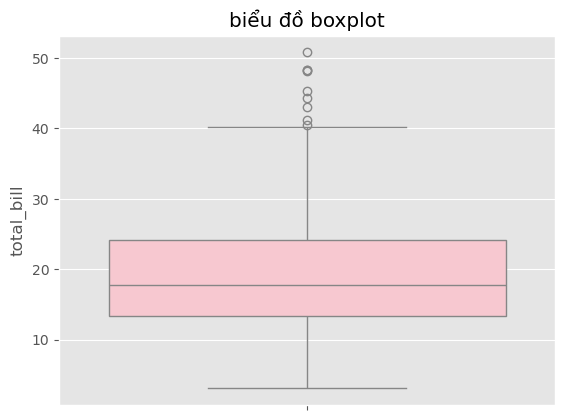

In [36]:
# 4
sns.boxplot(df.total_bill, color = 'pink)
plt.title('biểu đồ boxplot')
plt.show()

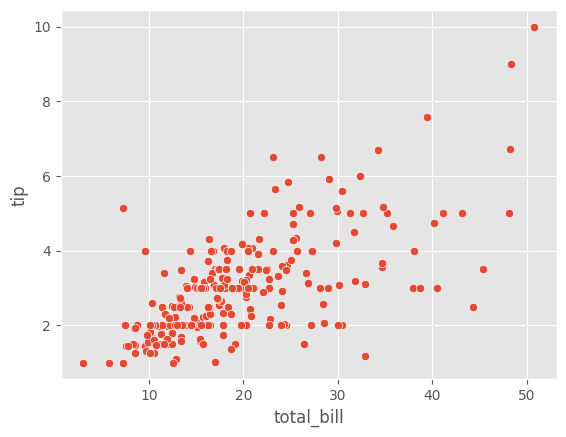

In [83]:
# 5
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.show()

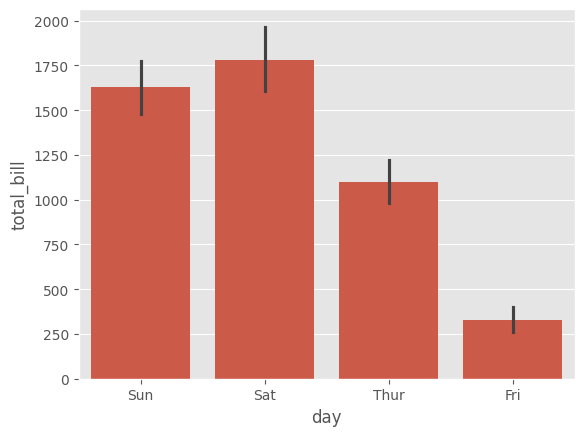

In [84]:
# 6
sns.barplot(x='day', y='total_bill', data=df, estimator=sum)
plt.show()

---
